In [19]:
# Physics Thesis Code for Calculating fusion rate 
# Author: Jacob van de Lindt 
# July 17th, 2019

# Using Guess's Law

import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

In [82]:
# Initialize Physical Dimensions of the Machine

R_cathode = 1
R_anode = 2
R_mag = 1.25

R_coil = .04
R_alloy = .01
R_steel = .01
R_stalk = .06

# Specify Physical constants 

mu_o = 1
epsi_o = 1
k = 1
e = 1
m_dueterium  = 2.014
m_neutron = 1.008664
m_proton = 1.007276
m_electron = 0.00054858

#Specify Tunable metrics:

I = 20 # [A]
V_grid = -10 # [V]
V_anode = 0 # [V]
Q_grid = -1000 # [C]
Amp = 500


In [70]:
# Define Position Space
dr = .001
r_vec = np.arange(0, R_anode, dr)


In [83]:
# Charge Density Initialization
def rho_init(r, period, Amplitude):
    return Amplitude*np.cos((np.pi/2*r) / period) * e
    

# Electric Field Helper Function
def E_grids(R):
    if R > R_cathode:
        return Q_grid / (4 * np.pi * epsi_o * R**2)
    else:
        return 0
v_E_grids = np.vectorize(E_grids)

# Electric Field Function:
def E_r(R):
    E_vec = np.zeros(R.shape[0])
    period = np.max(R)
    for index in range(E_vec.shape[0]):
        integral = 0
        r_top = R[index]
        for r in np.arange(0, r_top + dr, dr):
            integral = integral + ((r**2 * rho_init(r, period, Amp)) / epsi_o) * dr  
        E_vec[index] = (integral / r_top**2) + v_E_grids(r_top)
    
    return E_vec

def Phi_r(R_vec, E_vec):
    Phi_vec = np.zeros(R_vec.shape[0])
    Phi_o = 20
    for index in range(Phi_vec.shape[0]):
        integral = 0
        for r in np.arange(0, R_vec[index] + dr, dr):
            r_index = np.where(R_vec == r)
            integral = integral + E_vec[r_index] * dr
        
        Phi_vec[index] = Phi_o - integral
    return Phi_vec
       
    

C:\Users\jacob\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars


<IPython.core.display.Javascript object>


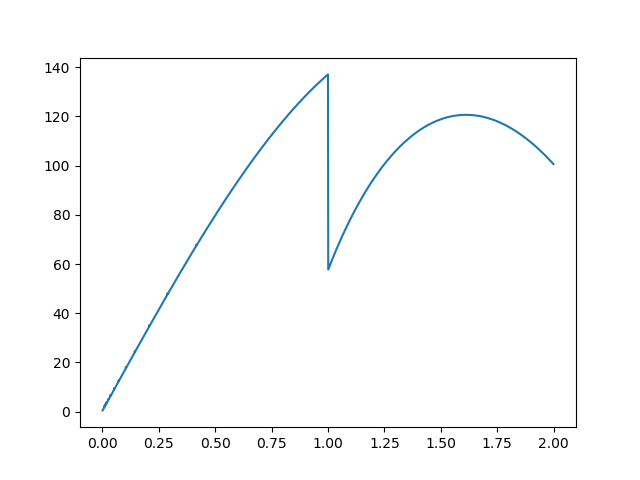

[  0.           0.49999985   0.62499934 ... 100.82186508 100.72136044
 100.6206139 ]


In [84]:
E_vec = E_r(r_vec)
plt.plot(r_vec, E_vec)
plt.show()
# artifically test
E_vec[0] = 0
print(E_vec)

<IPython.core.display.Javascript object>


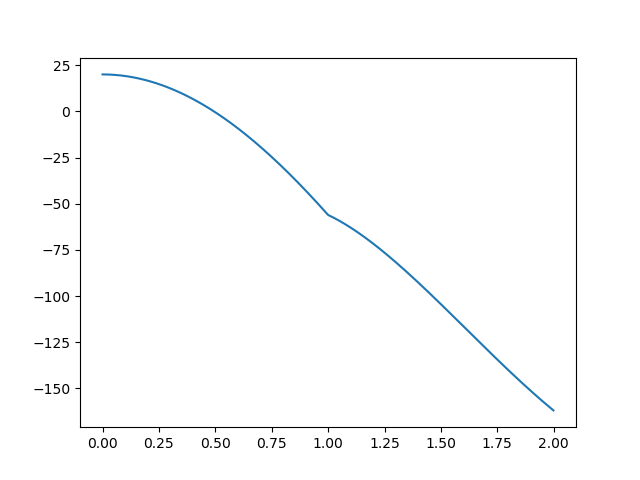

In [85]:
Phi_vec = Phi_r(r_vec, E_vec)
plt.plot(r_vec, Phi_vec)
plt.show()
#print(Phi_vec)

<IPython.core.display.Javascript object>


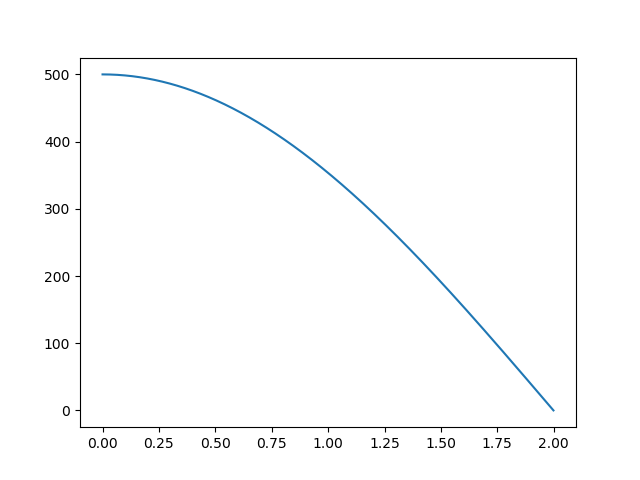

In [86]:
plt.plot(r_vec, rho_init(r_vec, np.max(r_vec), Amp))
plt.show()

In [88]:
def get_E(r_vec, E_vec):



def move_particle(r_vec, E_vec, num_time_steps, dt):
    q = e
    total_time = num_time_steps * dt
    pos_vec = np.zeros(num_time_steps)
    
    init_pos = R_anode - dr
    pos_vc[0] = init_pos
    
    while r_particle > 0:
        E = get_E(r_vec, E_vec)
        velocity_old = velocity
        velocity = velcoity_old + (q/m_dueterium)*E*dt
        
        pos_vec_old = pos_vec
        pos_vec = pos_vec_old + velocity * dt












# TEMPERARY 
def Particle_motion_study(r_vec, E_vec, num_time_steps, dt):
    q = e
    n = r_vec.shape[0]
    total_time = num_time_steps * dt
    
    pos_vec = np.zeros(num_time_steps)
    pos_vec[0] = R_anode - dr
    velocity_vec = np.zeros(num_time_steps)
    
    Vel_o = 0 
    velocity_vec[0] = Vel_o
    
    for t in range(1, (num_time_steps - 1)):
        particle_position = np.around((pos_vec[t-1] * 1000)/5, decimals=0)*5 / 1000
        print('the particle position is ')
        print(particle_position)
        #index = np.where(r_vec == np.around(pos_vec[t-1], decimals=3))
        index = np.where(r_vec == particle_position)
        print(index)
        E = E_vec[index]
        print(E)
        velocity_vec[t] = velocity_vec[t  -1] + (q/m_dueterium)*E*dt
        pos_vec[t] = pos_vec[t - 1] + velocity_vec[t] * dt
        print(pos_vec[t])
        print('check')
    return pos_vec, velocity_vec




















